https://www.kaggle.com/c/pubg-finish-placement-prediction

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
pd.options.display.max_columns = 30

# Import Data And EDA

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [5]:
train_data.shape

(4357336, 26)

In [6]:
train_data.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,5.547651e-01,1.987925e+01,4.207759e+01,4.058035e+01,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,7.223452e-01,4.586552e+01,2.267769e+01,2.206667e+01,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,1.629000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.400000e+01,1.323000e+03,1.000000e+02,1.000000e+02,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


### Data fields
DBNOs - Number of enemy players knocked.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.

revives - Number of times this player revived teammates.

rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.

swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)

groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [7]:
train_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [8]:
X = train_data[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
                'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 
                'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [9]:
y = train_data['winPlacePerc']

In [10]:
test_data = pd.read_csv('test.csv')

In [11]:
test_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object')

In [12]:
test_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,47734,1659463,47734,0,0,100.0,1,0,0,59,1000,0,0,0.000,50,45,0,0.0,0,0.0,1,0,421.50,7,1500
1,47735,1659508,47735,0,1,400.0,2,0,3,9,1200,4,2,15.420,48,47,1,0.0,0,0.0,0,0,655.80,4,1526
2,47736,1659555,47736,0,0,0.0,0,0,0,72,1216,0,0,0.000,29,28,0,0.0,0,0.0,0,0,74.58,1,1475
3,47737,1659621,47737,0,0,68.6,0,0,0,68,1177,0,0,0.000,97,92,0,0.0,0,0.0,0,0,167.20,2,1464
4,47738,1659675,47738,0,1,370.5,3,0,1,45,1013,1,1,5.968,27,26,0,0.0,0,0.0,0,0,146.70,3,1505


In [13]:
submissions = pd.read_csv('sample_submission.csv')

In [14]:
submissions.head()

,Id,winPlacePerc
0,47734,0
1,47735,0
2,47736,0
3,47737,0
4,47738,0


In [15]:
pred_feat = test_data[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
                'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 
                'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]

## Distribution of Target Variable

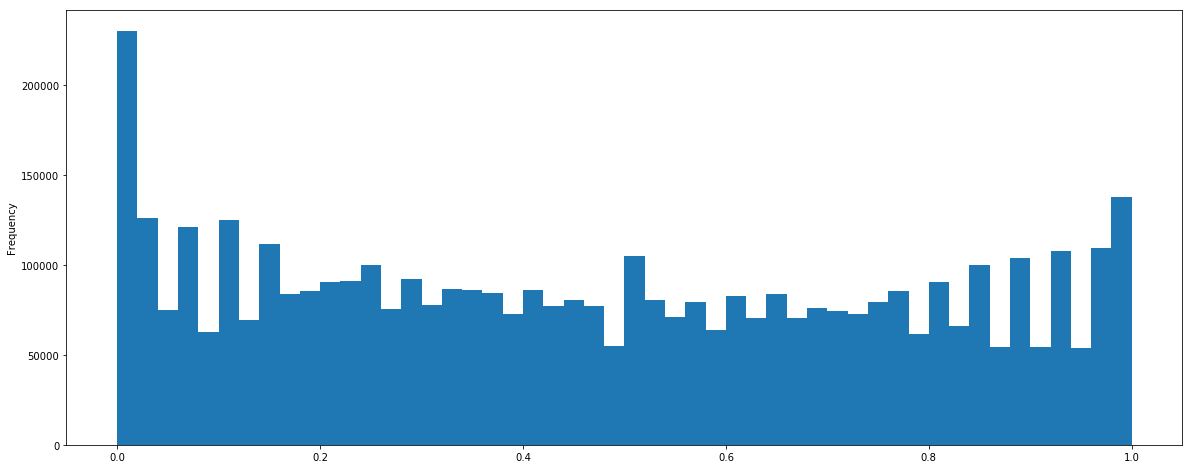

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
y.plot.hist(bins=50)
plt.show()

In [18]:
print('Average:', y.mean())
print('Mode:', y.mode())

Average: 0.47186630175
Mode: 0    0.0
dtype: float64


In [19]:
def insight(x):
    print('Average: {:.4f}'.format(train_data[x].mean()))
    print('99% quantile: {} '.format(train_data[x].quantile(0.99)))
    print('Max: {}'.format(train_data[x].max()))

## Kills

In [20]:
insight('kills')

Average: 0.9345
99% quantile: 7.0 
Max: 60


**Distribution:**

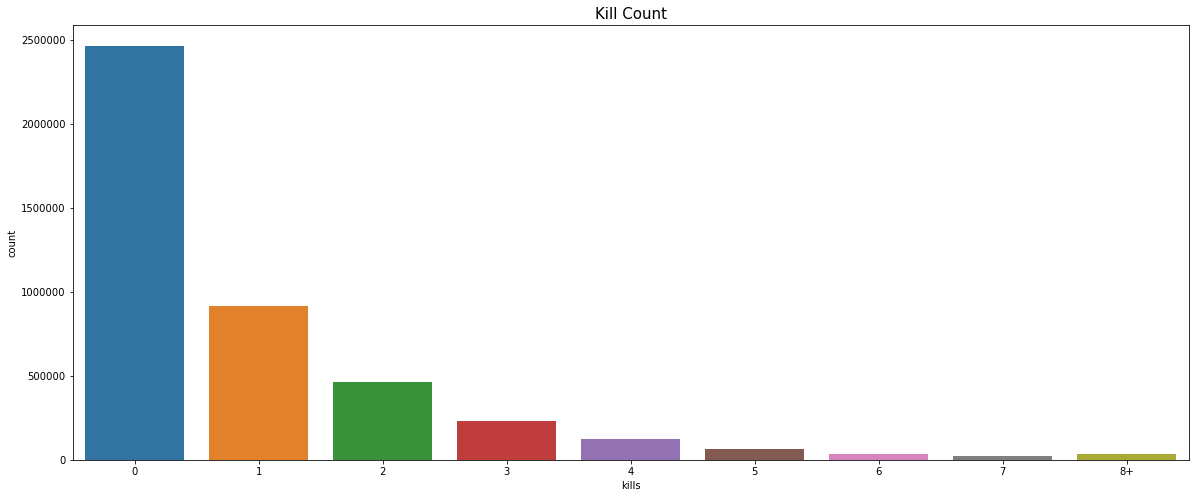

In [21]:
data = train_data['kills'].copy()
data[data > 7] = '8+'
plt.figure(figsize=(20,8))
sns.countplot(data.astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

Most people don't kill even 1... How much do they knockout, damage or assist

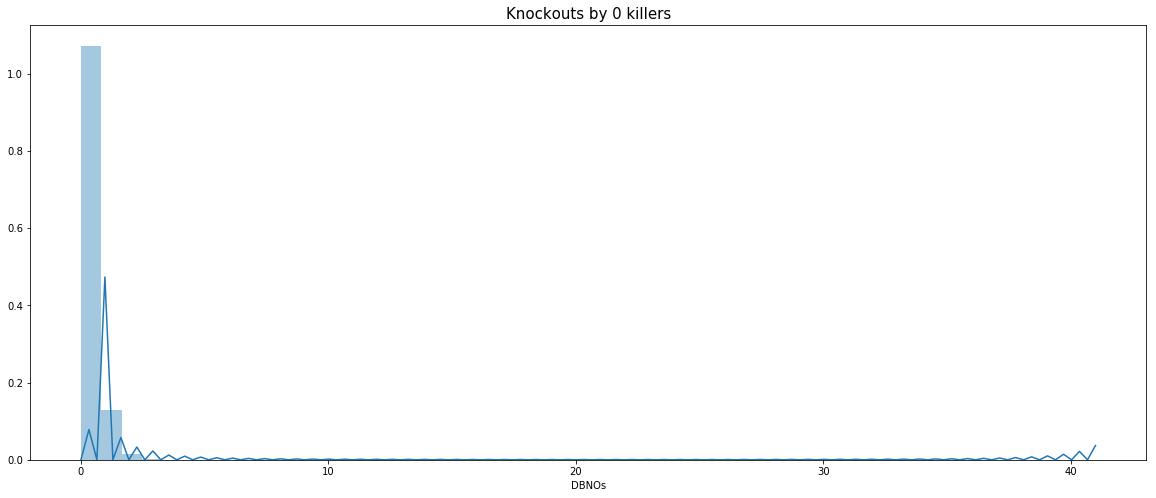

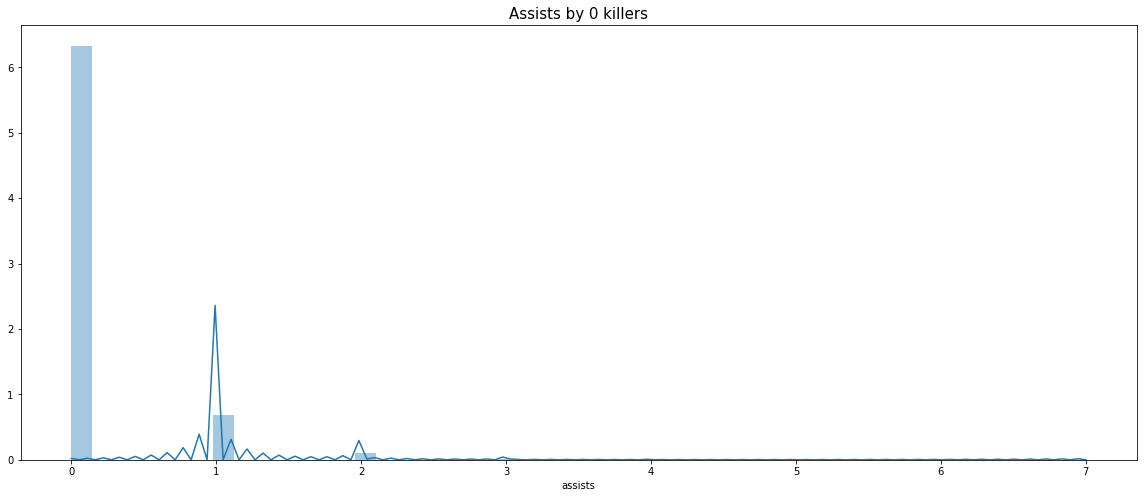

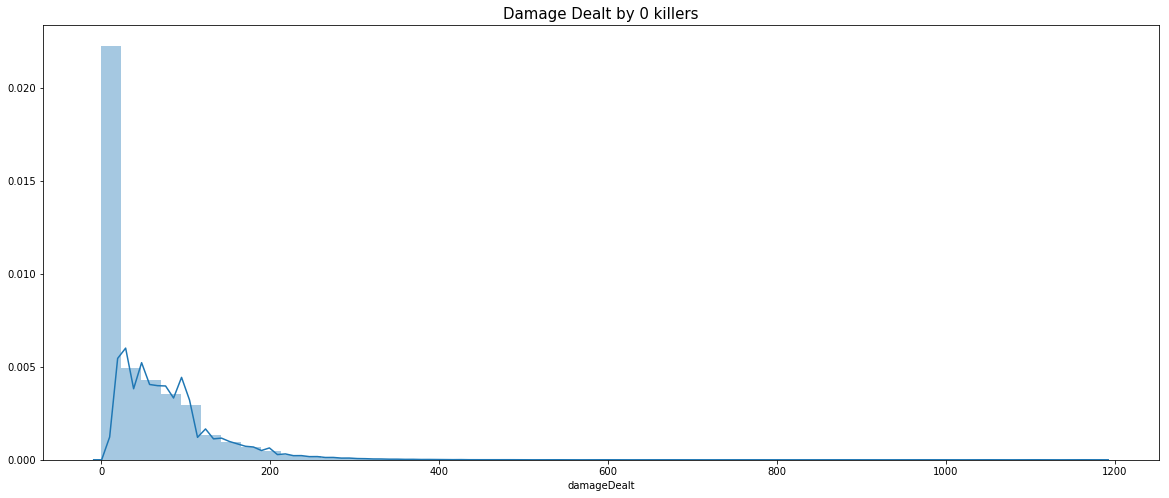

In [22]:
data = train_data[['kills', 'damageDealt', 'assists', 'DBNOs', 'winPlacePerc']].copy()
data = data[data['kills']==0]
plt.figure(figsize=(20,8))
plt.title("Knockouts by 0 killers",fontsize=15)
sns.distplot(data['DBNOs'])
plt.show()

plt.figure(figsize=(20,8))
plt.title("Assists by 0 killers",fontsize=15)
sns.distplot(data['assists'])
plt.show()

plt.figure(figsize=(20,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

Most of these didn't even assist, knockout or deal some damage

In [23]:
win_zerokills = len(data[data['winPlacePerc'] == 1])

In [24]:
total_players = len(train_data)

In [25]:
win_zerodamage = len(train_data[(train_data['damageDealt'] == 0) & (train_data['winPlacePerc'] == 1)])

In [26]:
win_zeroassist = len(train_data[(train_data['assists'] == 0) & (train_data['winPlacePerc'] == 1)])

In [27]:
win_zeroknocks = len(train_data[(train_data['DBNOs'] == 0) & (train_data['winPlacePerc'] == 1)])

In [28]:
print('{} ({:.4f}%) players won without even one kill'.format(win_zerokills, win_zerokills*100/total_players))

16722 (0.3838%) players won without even one kill


In [29]:
print('{} ({:.4f}%) players won without even knocking someone out'.format(win_zeroknocks, win_zeroknocks*100/total_players))

34803 (0.7987%) players won without even knocking someone out


In [30]:
print('{} ({:.4f}%) players won without even assisting'.format(win_zeroassist, win_zeroassist*100/total_players))

47355 (1.0868%) players won without even assisting


In [31]:
print('{} ({:.4f}%) players won without dealing some damage'.format(win_zerodamage, win_zerodamage*100/total_players))

4262 (0.0978%) players won without dealing some damage


**Win percentage v/s kills**

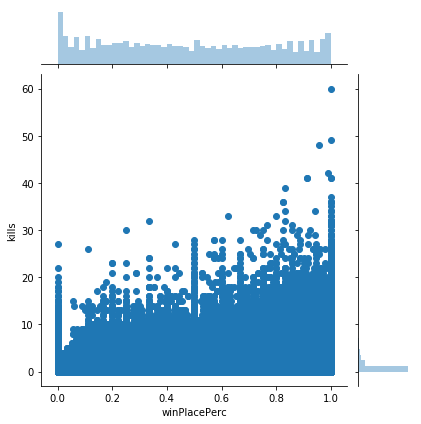

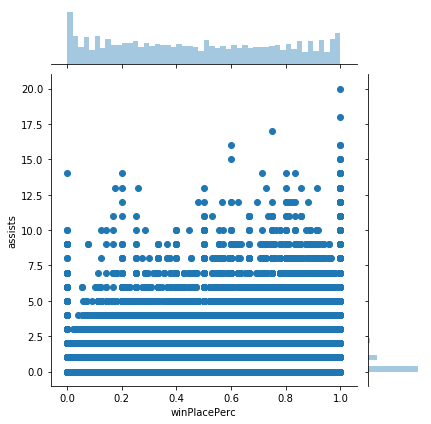

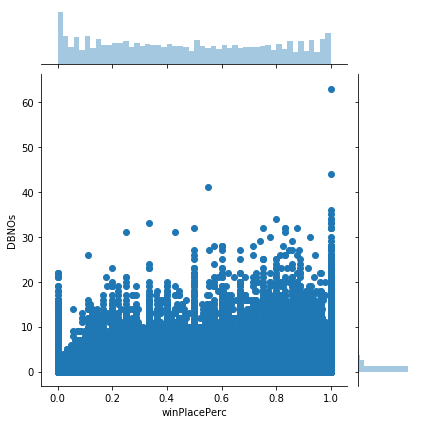

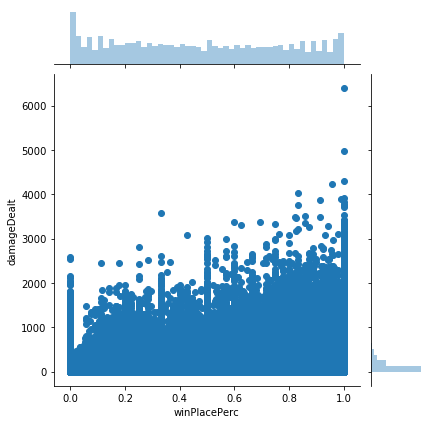

In [32]:
sns.jointplot(x='winPlacePerc', y='kills', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='assists', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='DBNOs', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='damageDealt', data=train_data)
plt.show()

**Correlation between killing and winning**

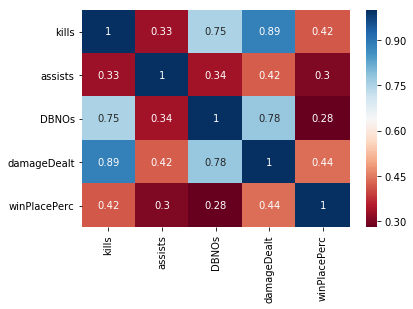

In [33]:
sns.heatmap(train_data[['kills', 'assists', 'DBNOs', 'damageDealt', 'winPlacePerc']].corr(), cmap='RdBu',annot=True)
plt.show()

In [34]:
insight('DBNOs')

Average: 0.6901
99% quantile: 5.0 
Max: 63


In [35]:
insight('assists')

Average: 0.2656
99% quantile: 3.0 
Max: 20


In [36]:
insight('damageDealt')

Average: 132.9033
99% quantile: 775.8 
Max: 6384.0


## Boosts Heals Revives

** Insights **

In [37]:
insight('boosts')

Average: 0.9637
99% quantile: 7.0 
Max: 18


In [38]:
insight('heals')

Average: 1.1872
99% quantile: 11.0 
Max: 59


In [39]:
insight('revives')

Average: 0.1649
99% quantile: 2.0 
Max: 41


In [40]:
data = train_data[['winPlacePerc', 'kills']].copy()
for x in ['boosts', 'heals', 'revives']:
    data1 = train_data[x].copy()
    print(data1.unique())
    data1[data1 > (data1.quantile(0.99)-1)] = (str(int(data1.quantile(0.99)))+'+')
    print(data1.unique())
    data = pd.concat([data, data1], axis=1)

[ 5  0  1  2  3  6  4 10  9  8  7 12 11 13 14 15 17 16 18]
[5 0 1 2 3 6 4 '7+']
[ 4  0  2  1  5  3  8  6 15 12 11  7 16 17 19  9 10 21 29 14 24 13 18 20 28
 25 23 22 48 27 26 33 34 40 30 31 43 32 37 38 35 36 39 55 41 58 42 59 45 46]
[4 0 2 1 5 3 8 6 '11+' 7 9 10]
[ 1  0  5  2  4  3  7  6  8 12  9 10 18 13 19 14 11 17 20 15 32 41]
[1 0 '2+']


In [41]:
def heal_fix(x):
    if x != '11+' and x != 10:
        return '0'+str(x)
    if x == 10:
        return '10'
    else:
        return x
    

In [42]:
data['heals'] = data['heals'].apply(heal_fix)

In [43]:
data.head()

,winPlacePerc,kills,boosts,heals,revives
0,0.8571,2,5,04,1
1,0.0400,1,0,00,0
2,0.7407,0,1,02,1
3,0.1146,0,0,00,0
4,0.5217,0,1,01,0


** Distribution **

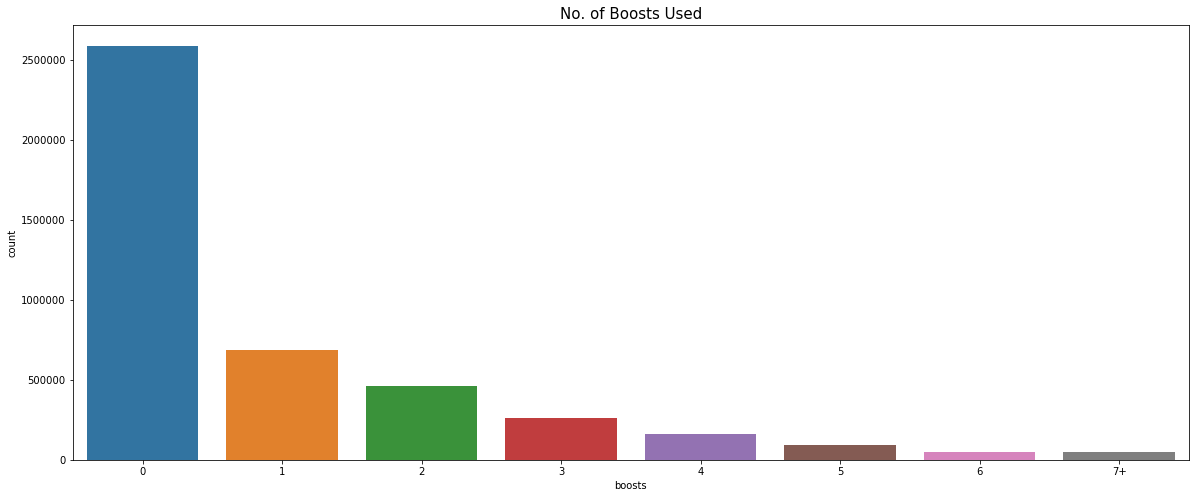

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(data['boosts'].astype('str').sort_values())
plt.title("No. of Boosts Used",fontsize=15)
plt.show()

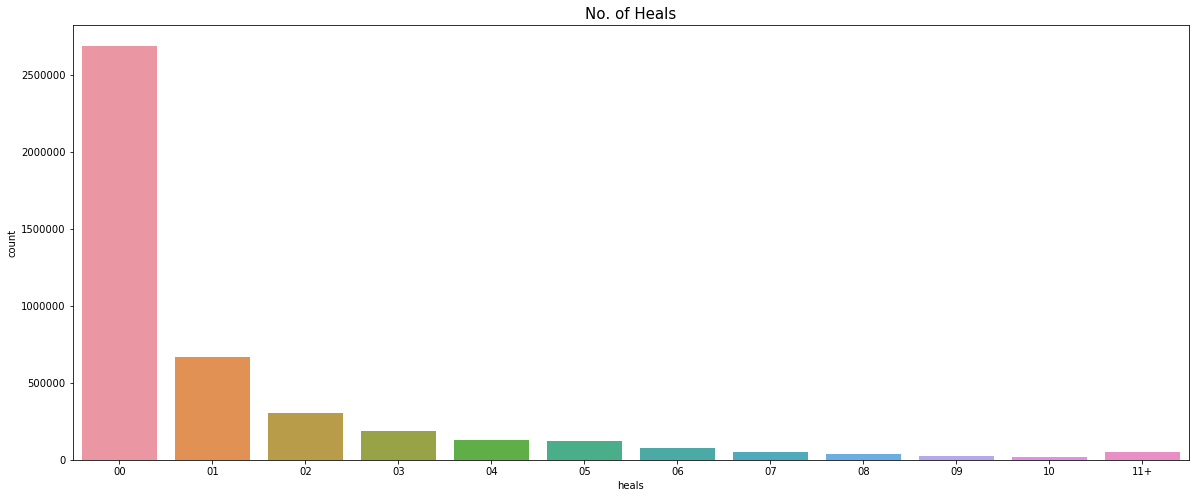

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(data['heals'].astype('str').sort_values())
plt.title("No. of Heals",fontsize=15)
plt.show()

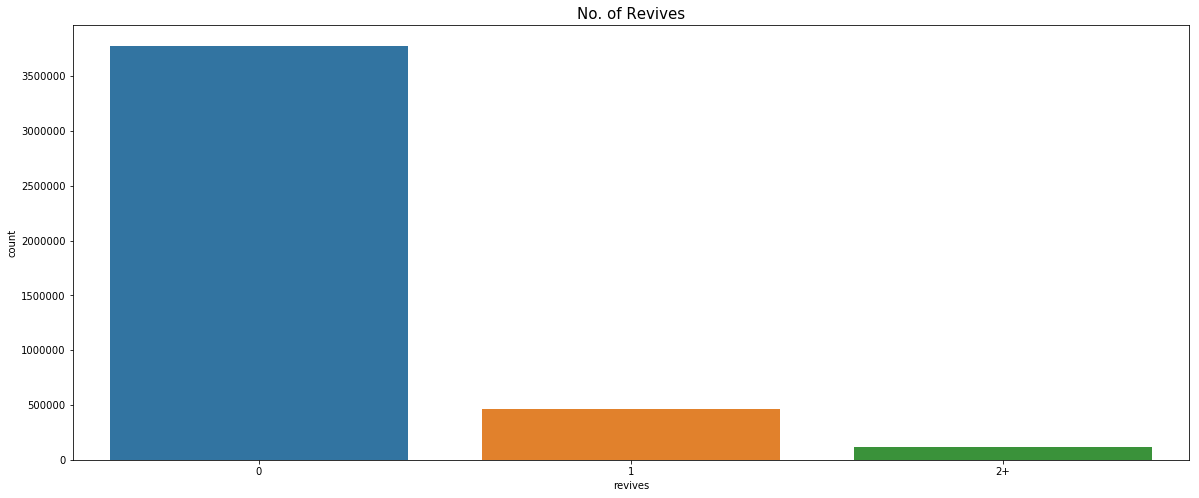

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(data['revives'].astype('str').sort_values())
plt.title("No. of Revives",fontsize=15)
plt.show()

** Correlation **

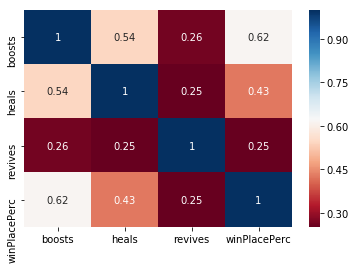

In [47]:
sns.heatmap(train_data[['boosts', 'heals', 'revives', 'winPlacePerc']].corr(), cmap='RdBu',annot=True)
plt.show()

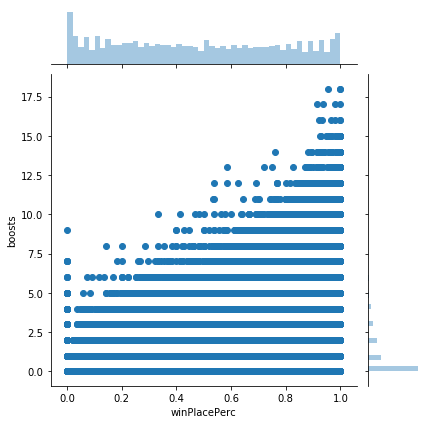

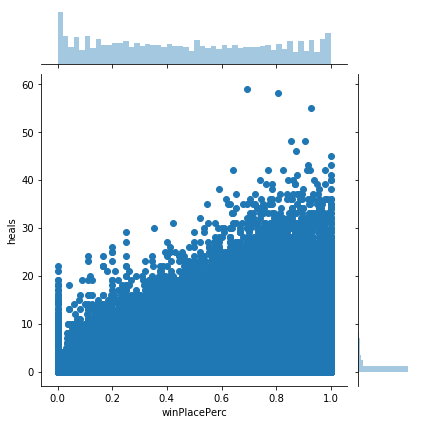

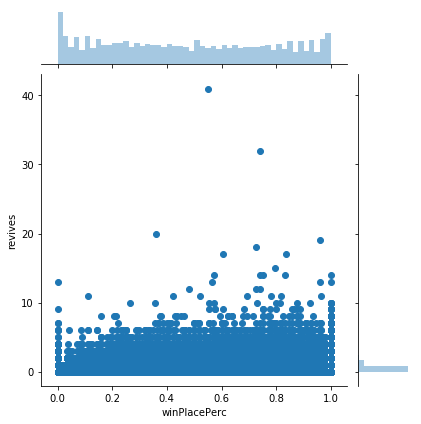

In [48]:
sns.jointplot(x='winPlacePerc', y='boosts', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='heals', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='revives', data=train_data)
plt.show()

##  Ride Swim Walk

** Insights **

In [49]:
insight('walkDistance')

Average: 1055.1221
99% quantile: 4138.0 
Max: 17300.0


In [50]:
insight('rideDistance')

Average: 423.8835
99% quantile: 6133.0 
Max: 48390.0


In [51]:
insight('swimDistance')

Average: 4.1363
99% quantile: 116.19999999999999 
Max: 5286.0


** Distribution **

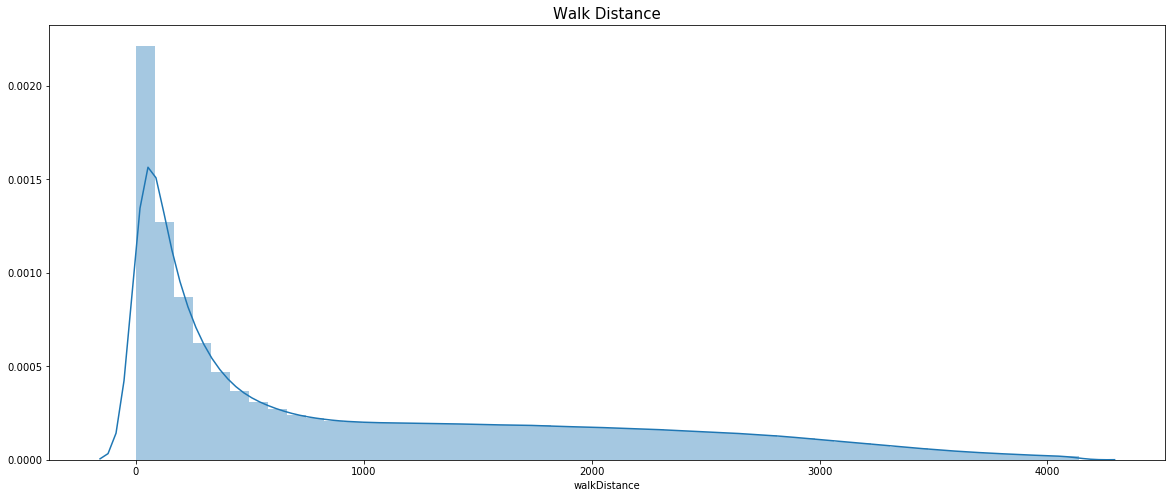

In [62]:
data = train_data['walkDistance'].copy()
data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Walk Distance",fontsize=15)
plt.show()

In [60]:
print('{} ({:.4f}%) walked 0 meters,which means they were killed before even taking a step'
      .format(len(train_data[train_data['walkDistance'] == 0]),
              len(train_data[train_data['walkDistance'] == 0])*100/len(train_data)))

94306 (2.1643%) walked 0 meters,which means they were killed before even taking a step


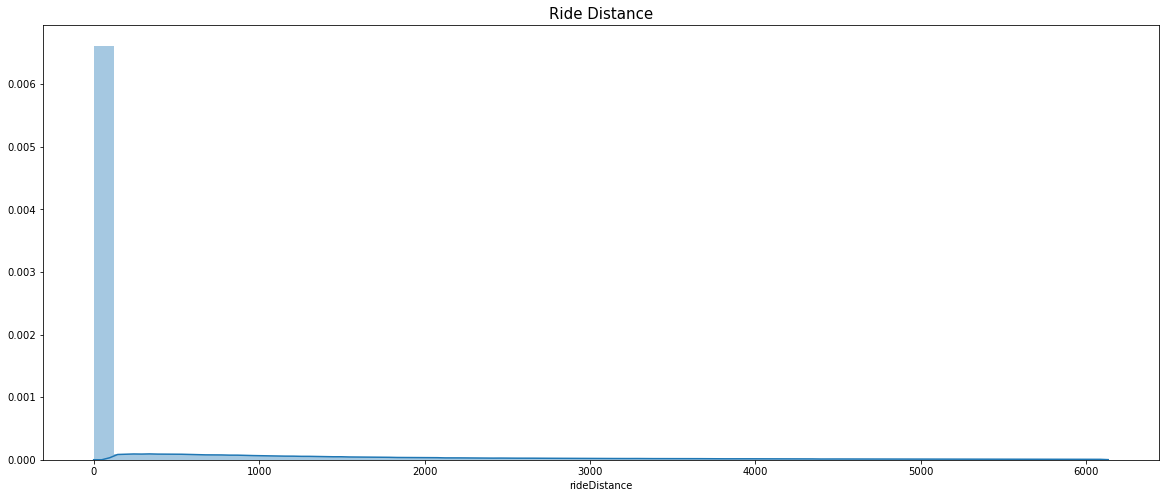

In [63]:
data = train_data['rideDistance'].copy()
data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Ride Distance",fontsize=15)
plt.show()

In [74]:
print("{} ({:.4f}%) rode 0 meters,which means they couldn't find a vehicle"
      .format(len(train_data[train_data['rideDistance'] == 0]),
              len(train_data[train_data['rideDistance'] == 0])*100/len(train_data)))

3439985 (78.9470%) rode 0 meters,which means they couldn't find a vehicle


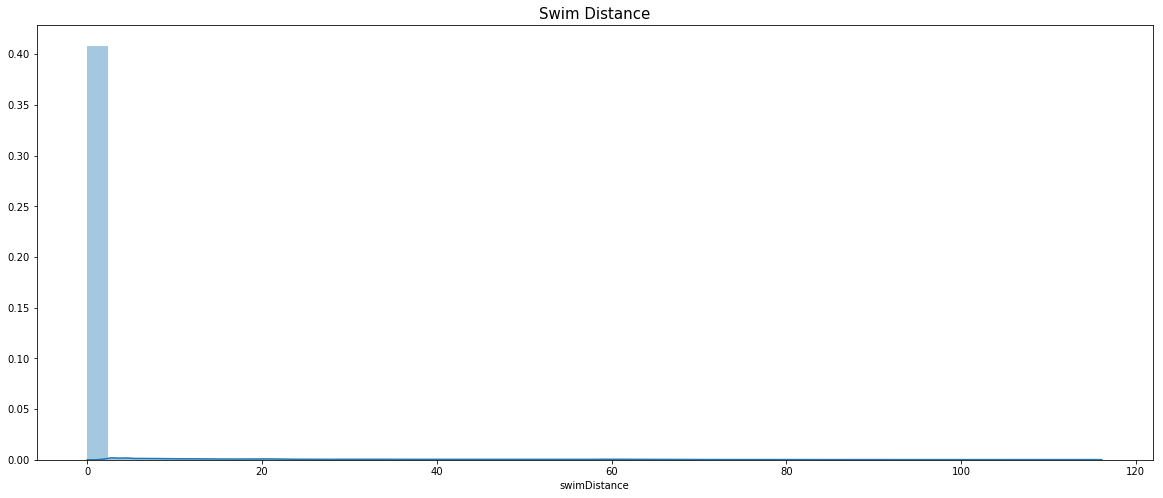

In [64]:
data = train_data['swimDistance'].copy()
data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Swim Distance",fontsize=15)
plt.show()

In [73]:
print("{} ({:.4f}%) swim 0 meters,which means they need not to swim"
      .format(len(train_data[train_data['swimDistance'] == 0]),
              len(train_data[train_data['swimDistance'] == 0])*100/len(train_data)))

4076544 (93.5559%) swim 0 meters,which means they need not to swim


** Correlation **

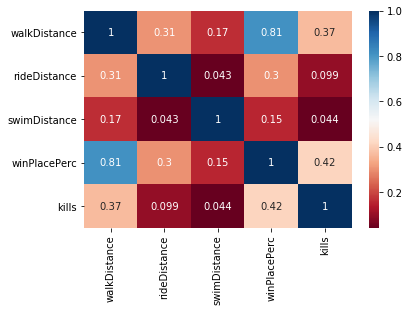

In [69]:
sns.heatmap(train_data[['walkDistance', 'rideDistance', 'swimDistance', 'winPlacePerc', 'kills']].corr(), cmap='RdBu',annot=True)
plt.show()

Walk Distance is highly correlated with winning

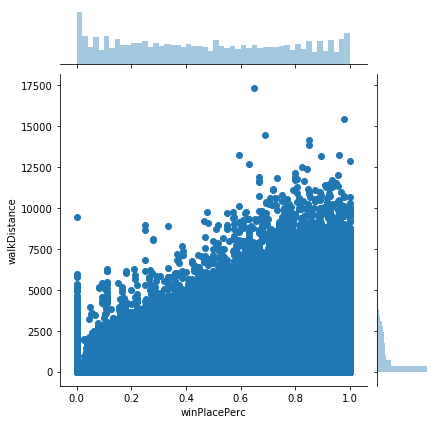

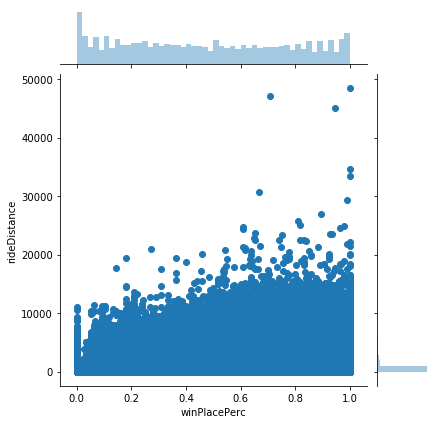

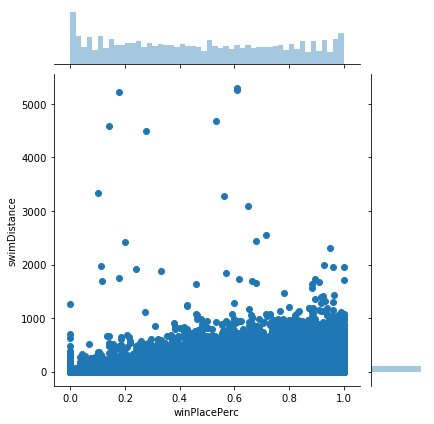

In [70]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='rideDistance', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='swimDistance', data=train_data)
plt.show()

## Team Kills, Head shot Kills, Longest Kill, Road Kills, Vehicle Kills, Kill Streaks

** Insights **

In [85]:
insight('headshotKills')

Average: 0.2386
99% quantile: 3.0 
Max: 26


In [86]:
insight('killStreaks')

Average: 0.5548
99% quantile: 3.0 
Max: 14


In [87]:
insight('longestKill')

Average: 19.8792
99% quantile: 225.3 
Max: 1323.0


In [88]:
insight('roadKills')

Average: 0.0026
99% quantile: 0.0 
Max: 42


In [89]:
insight('teamKills')

Average: 0.0139
99% quantile: 1.0 
Max: 6


In [90]:
insight('vehicleDestroys')

Average: 0.0051
99% quantile: 0.0 
Max: 5


** Distribution **

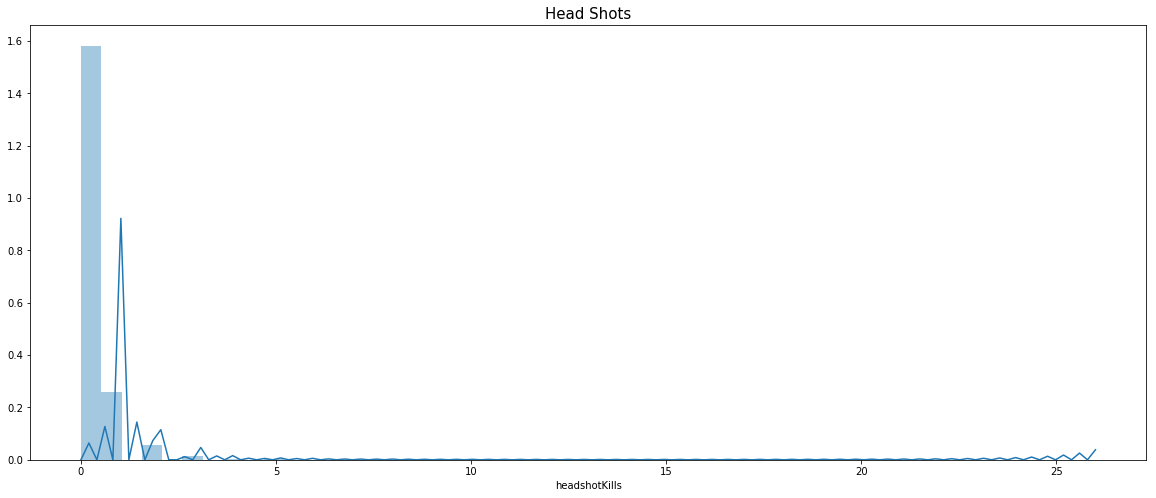

In [94]:
data = train_data['headshotKills'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Head Shots",fontsize=15)
plt.show()

In [92]:
print('{} ({:.4f}%) had 0 headshots'
      .format(len(train_data[train_data['headshotKills'] == 0]),
              len(train_data[train_data['headshotKills'] == 0])*100/len(train_data)))

3586587 (82.3115%) had 0 headshots


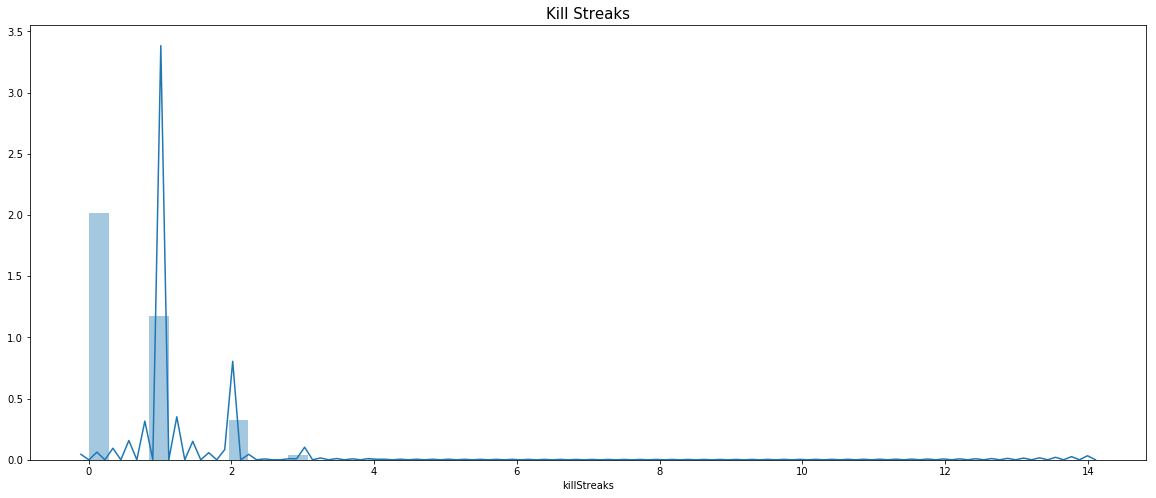

In [95]:
data = train_data['killStreaks'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Kill Streaks",fontsize=15)
plt.show()

In [97]:
print('{} ({:.4f}%) had kill streaks less than 3'
      .format(len(train_data[train_data['killStreaks'] <= 3]),
              len(train_data[train_data['killStreaks'] <= 3])*100/len(train_data)))

4350368 (99.8401%) had kill streaks less than 3


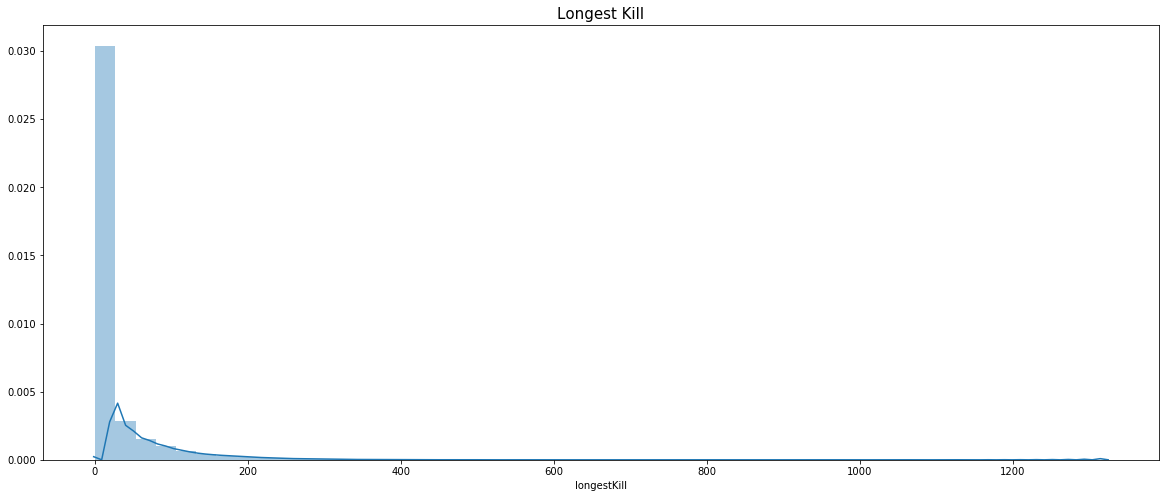

In [101]:
data = train_data['longestKill'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Longest Kill",fontsize=15)
plt.show()

In [102]:
print('{} ({:.4f}%) had kill from a distance less than 50 meters'
      .format(len(train_data[train_data['longestKill'] <= 50]),
              len(train_data[train_data['longestKill'] <= 50])*100/len(train_data)))

3803874 (87.2982%) had kill from a distance less than 50 meters


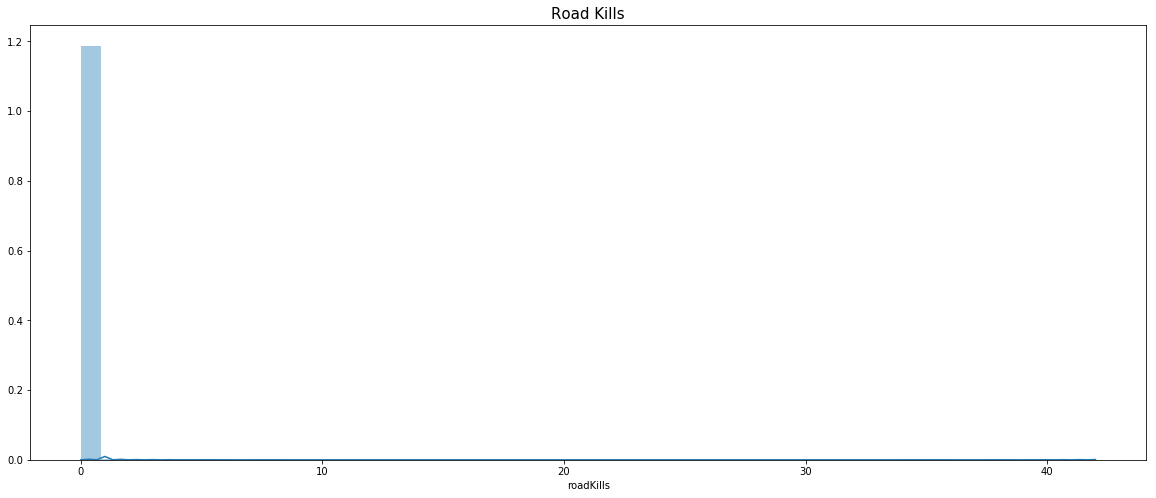

In [103]:
data = train_data['roadKills'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Road Kills",fontsize=15)
plt.show()

In [104]:
print('{} ({:.4f}%) had 0 road kills'
      .format(len(train_data[train_data['roadKills'] == 0]),
              len(train_data[train_data['roadKills'] == 0])*100/len(train_data)))

4347655 (99.7778%) had 0 road kills


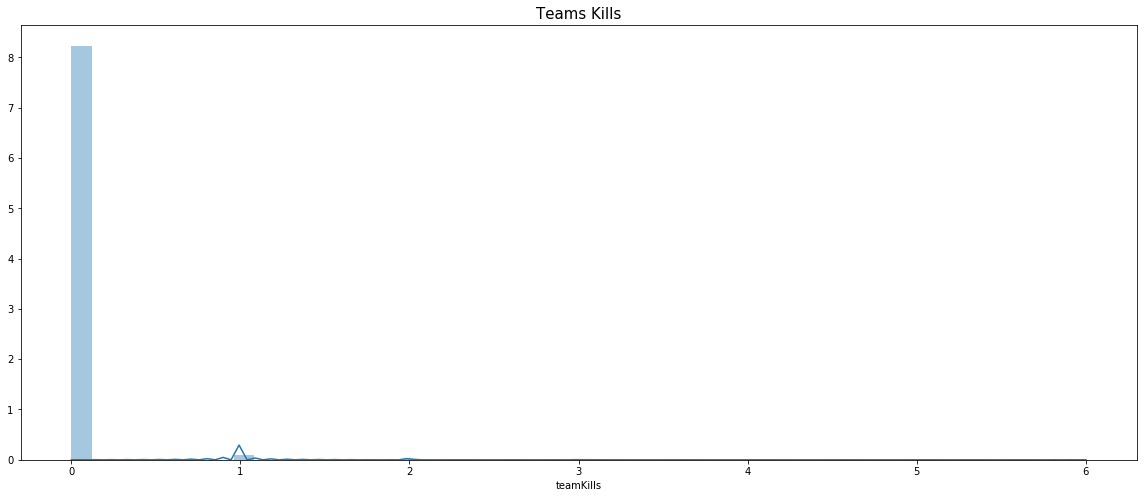

In [105]:
data = train_data['teamKills'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Teams Kills",fontsize=15)
plt.show()

In [106]:
print('{} ({:.4f}%) had 0 team kills'
      .format(len(train_data[train_data['teamKills'] == 0]),
              len(train_data[train_data['teamKills'] == 0])*100/len(train_data)))

4304426 (98.7857%) had 0 team kills


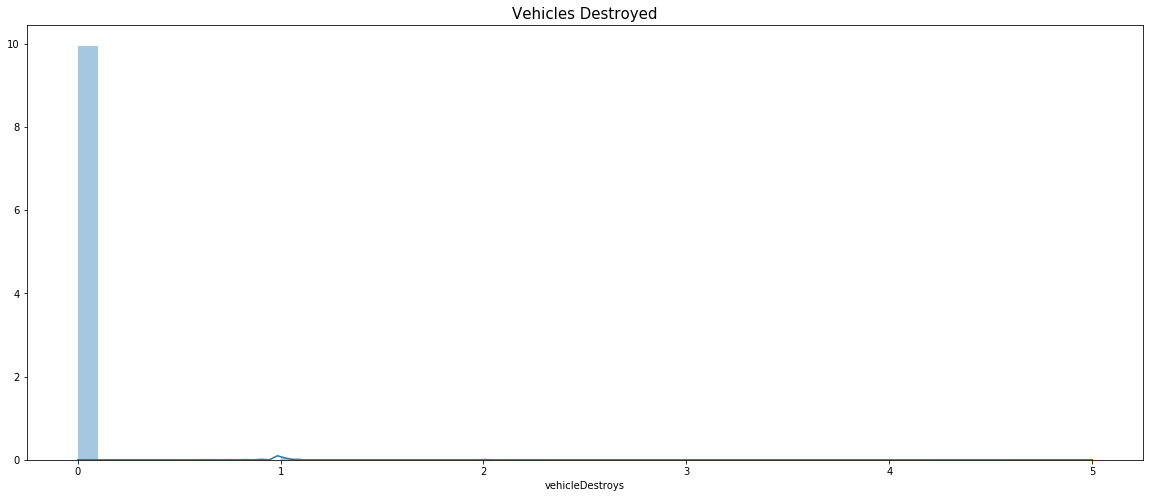

In [107]:
data = train_data['vehicleDestroys'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Vehicles Destroyed",fontsize=15)
plt.show()

In [108]:
print('{} ({:.4f}%) had destroyed 0 vehicles'
      .format(len(train_data[train_data['vehicleDestroys'] == 0]),
              len(train_data[train_data['vehicleDestroys'] == 0])*100/len(train_data)))

4335704 (99.5035%) had destroyed 0 vehicles


** Correlation **

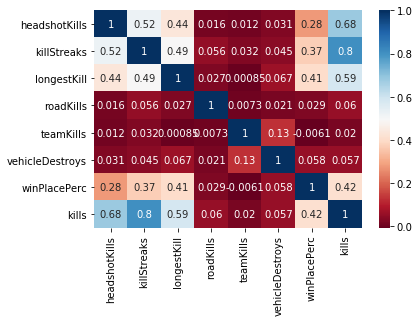

In [110]:
sns.heatmap(train_data[['headshotKills', 'killStreaks', 'longestKill', 'roadKills', 'teamKills', 'vehicleDestroys', 
                        'winPlacePerc', 'kills']].corr(), cmap='RdBu',annot=True)
plt.show()

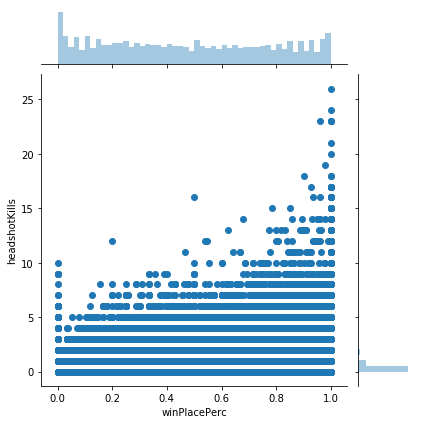

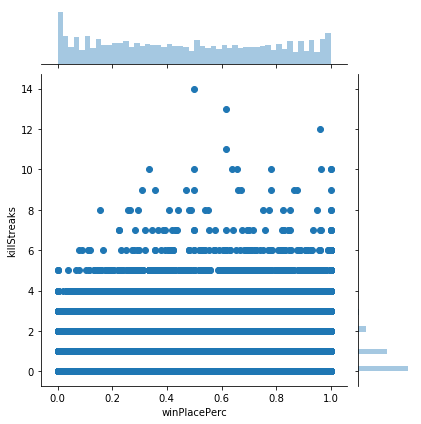

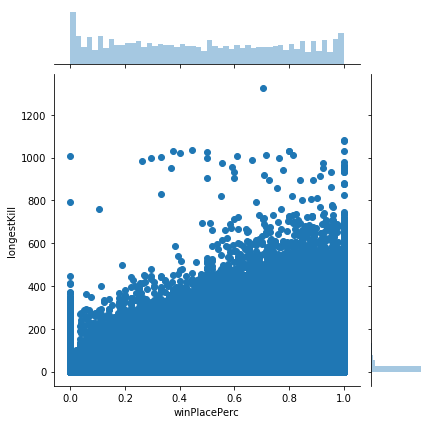

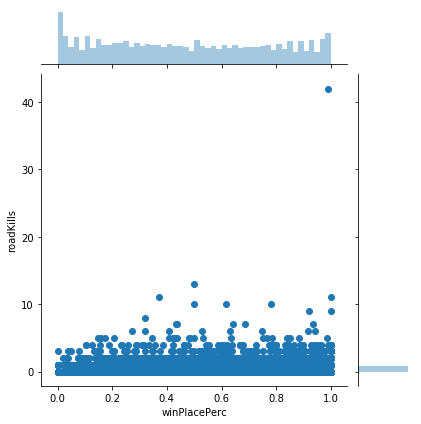

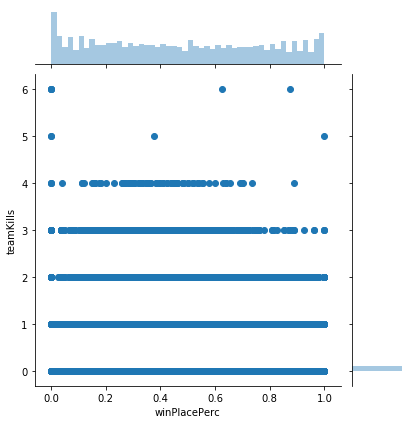

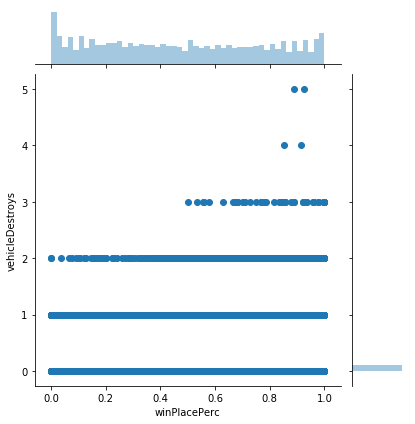

In [118]:
sns.jointplot(x='winPlacePerc', y='headshotKills', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='killStreaks', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='longestKill', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='roadKills', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='teamKills', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='vehicleDestroys', data=train_data)
plt.show()

## Weapons Acquired, Kills, Kill place, Kill points

** Insights **

In [114]:
insight('weaponsAcquired')

Average: 3.4573
99% quantile: 10.0 
Max: 76


In [115]:
insight('killPlace')

Average: 47.0344
99% quantile: 96.0 
Max: 100


In [116]:
insight('killPoints')

Average: 1080.8976
99% quantile: 1511.0 
Max: 2047


** Distribution **

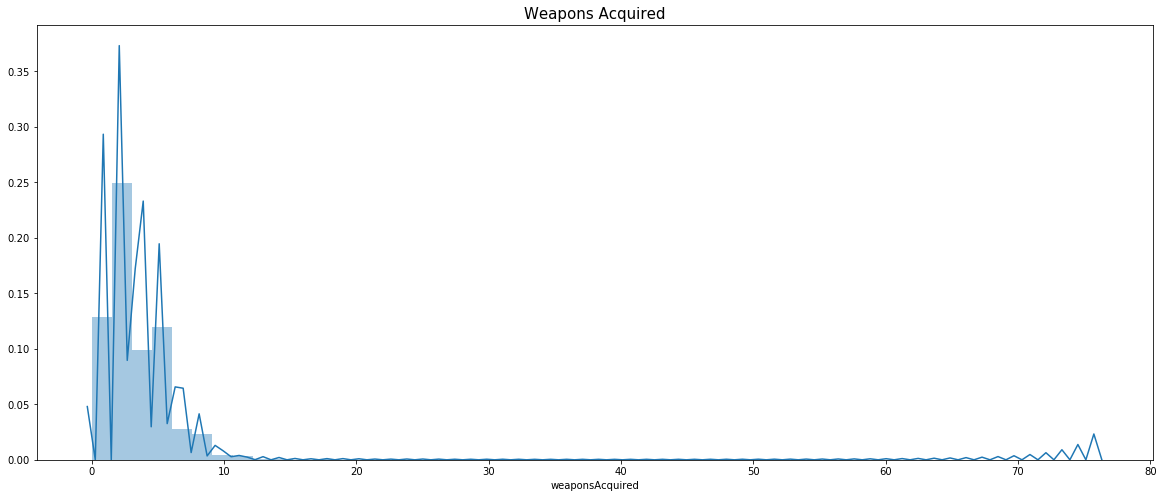

In [117]:
data = train_data['weaponsAcquired'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Weapons Acquired",fontsize=15)
plt.show()

In [119]:
print("{} ({:.4f}%) couldn't even acquire a weapon"
      .format(len(train_data[train_data['weaponsAcquired'] == 0]),
              len(train_data[train_data['weaponsAcquired'] == 0])*100/len(train_data)))

227198 (5.2141%) couldn't even acquire a weapon


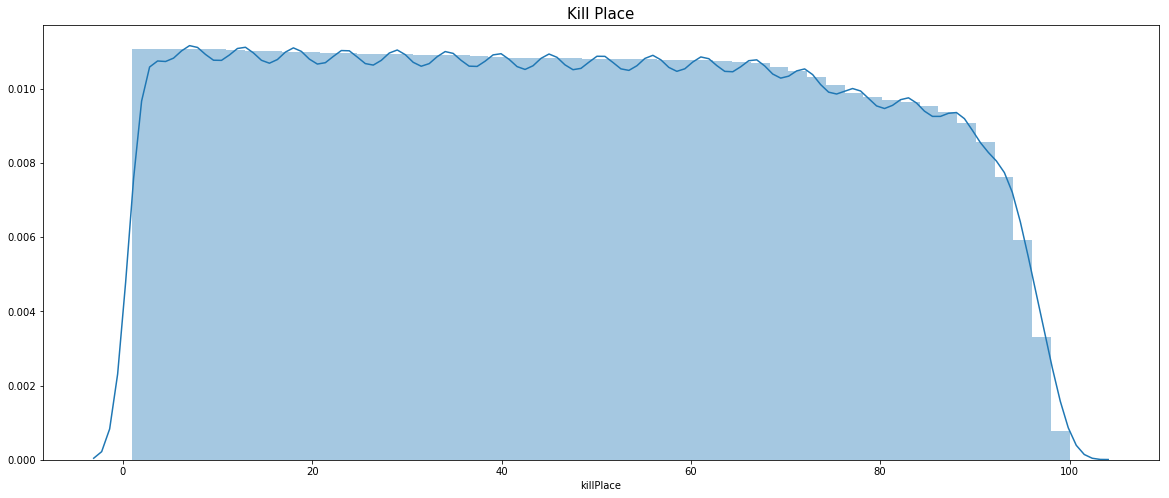

In [120]:
data = train_data['killPlace'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Kill Place",fontsize=15)
plt.show()

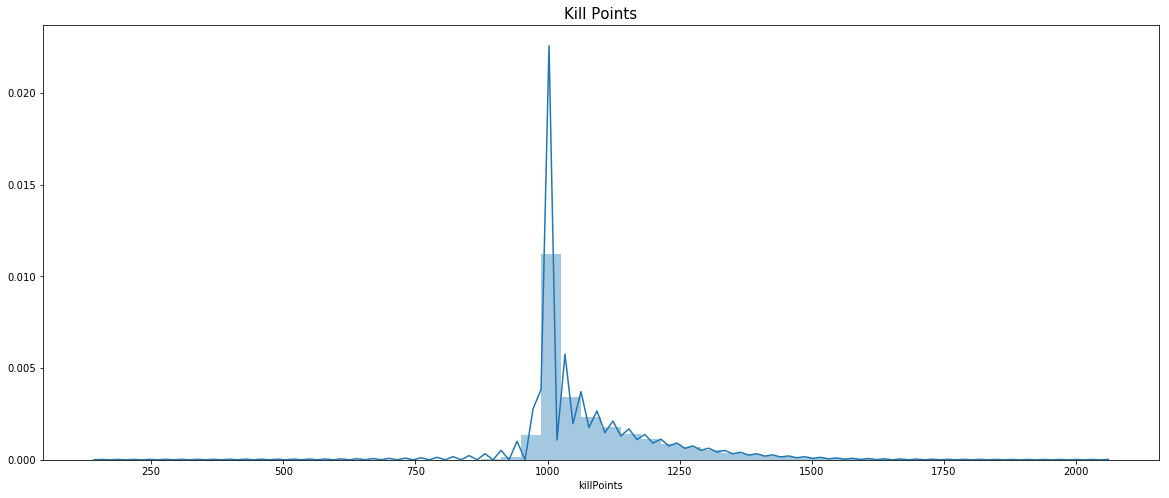

In [121]:
data = train_data['killPoints'].copy()
# data = data[data < data.quantile(0.99)]
plt.figure(figsize=(20,8))
sns.distplot(data)
plt.title("Kill Points",fontsize=15)
plt.show()

In [124]:
print("{} ({:.4f}%) had 1000 kill points"
      .format(len(train_data[train_data['killPoints'] == 1000]),
              len(train_data[train_data['killPoints'] == 1000])*100/len(train_data)))

1158252 (26.5817%) had 1000 kill points


** Correlation **

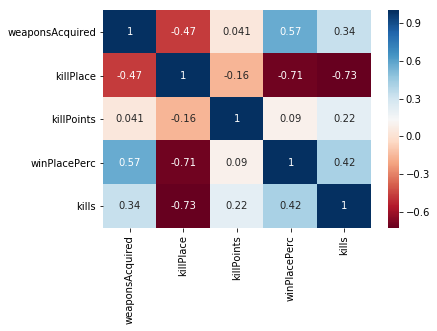

In [122]:
sns.heatmap(train_data[['weaponsAcquired', 'killPlace', 'killPoints', 
                        'winPlacePerc', 'kills']].corr(), cmap='RdBu',annot=True)
plt.show()

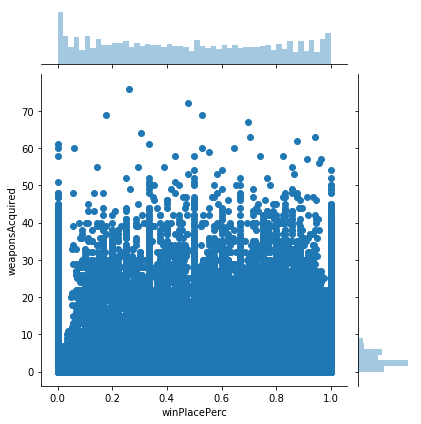

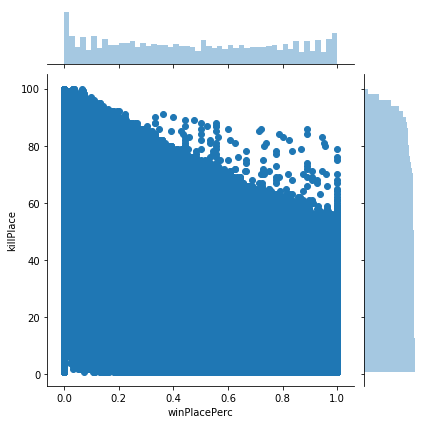

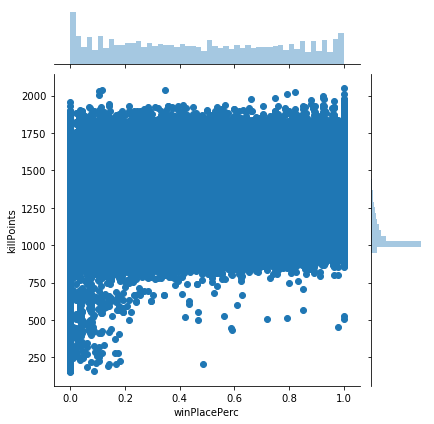

In [123]:
sns.jointplot(x='winPlacePerc', y='weaponsAcquired', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='killPlace', data=train_data)
plt.show()
sns.jointplot(x='winPlacePerc', y='killPoints', data=train_data)
plt.show()

## Solos Duos Squads

In [ ]:
solos = train_data[train_data['numGroups']>50]
duos = train_data[(train_data['numGroups']>25) & (train_data['numGroups']<=50)]
squads = train_data[train_data['numGroups']<=25]
print("There are {} ({:.2f}%) solo games,\n\t  {} ({:.2f}%) duo games and\n\t  {} ({:.2f}%) squad games."
      .format(len(solos), 100*len(solos)/len(train_data),
              len(duos), 100*len(duos)/len(train_data),
              len(squads), 100*len(squads)/len(train_data),))

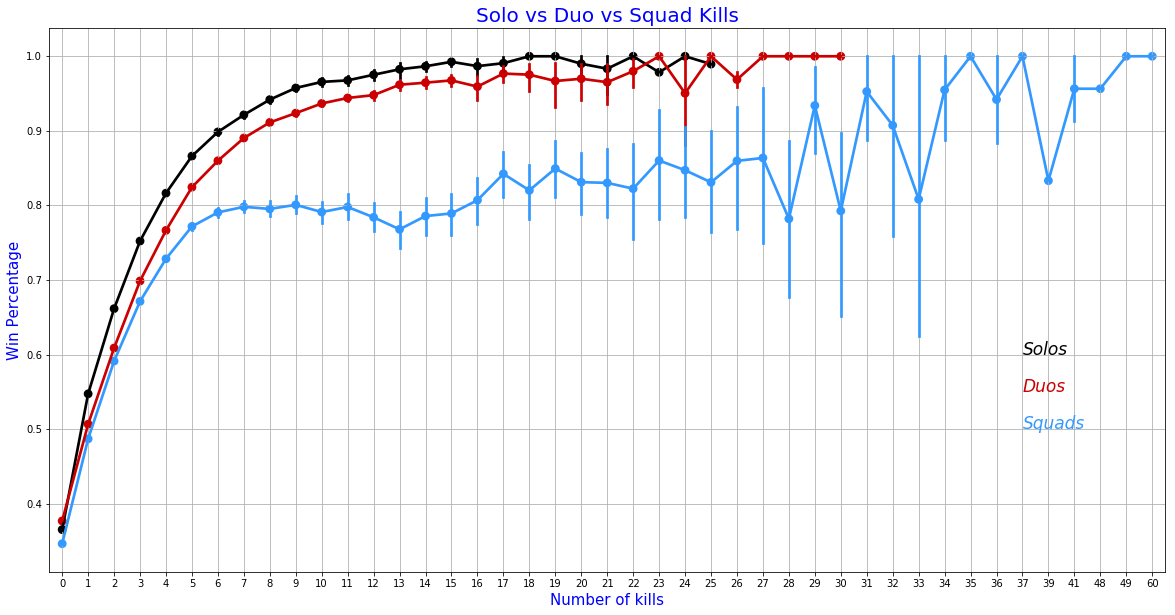

In [84]:
fig,ax = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

Solo and Duo behave pretty mush the same

## Scatterplot of various features with target Variable

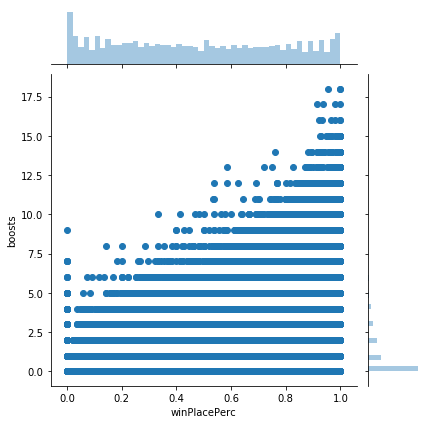

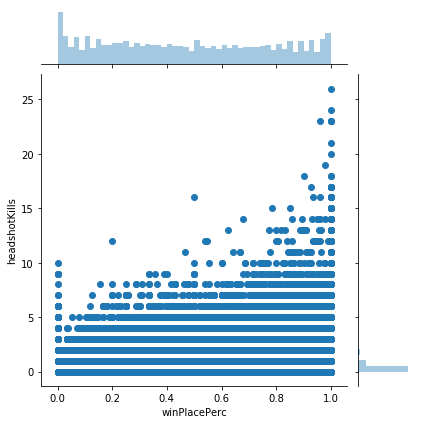

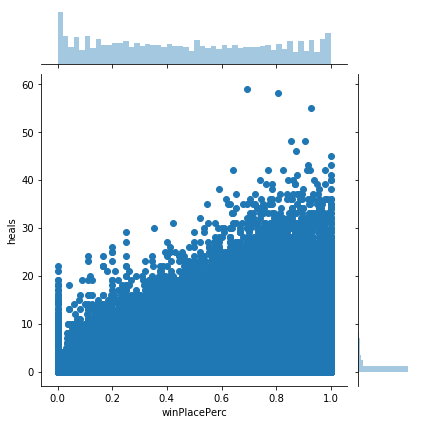

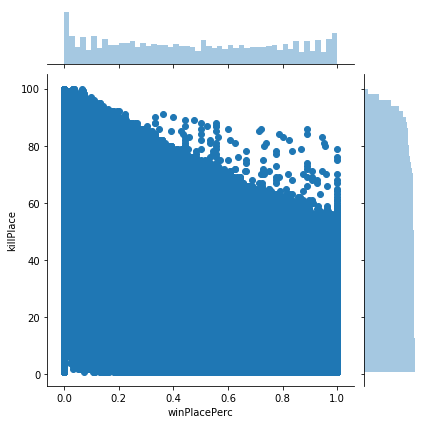

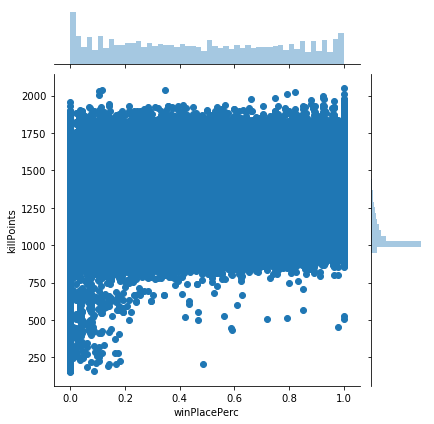

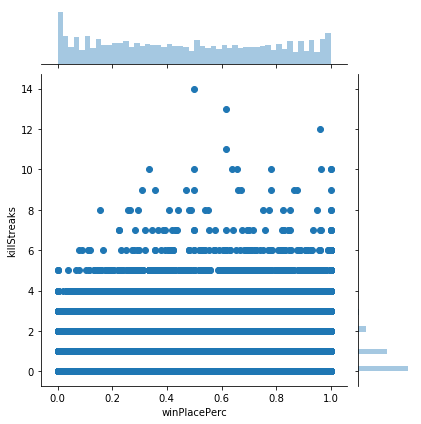

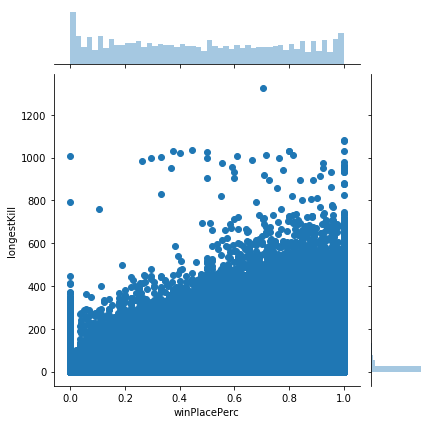

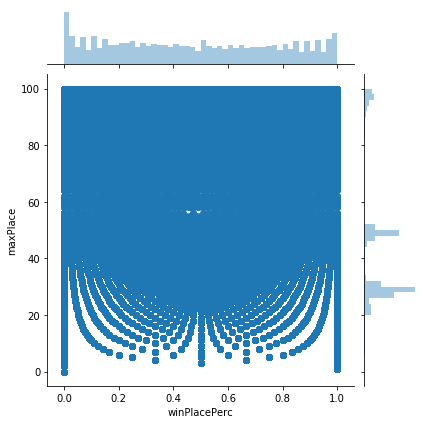

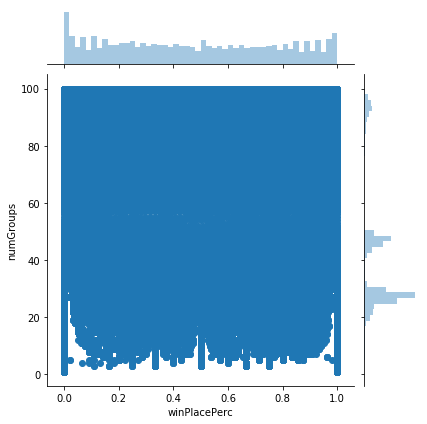

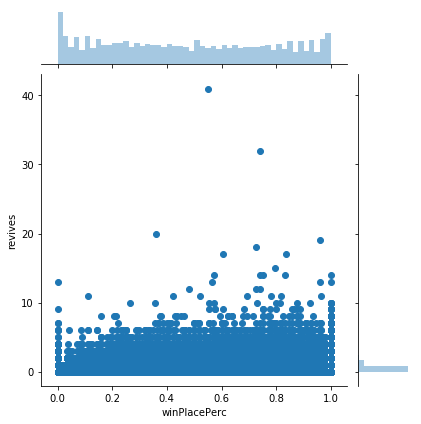

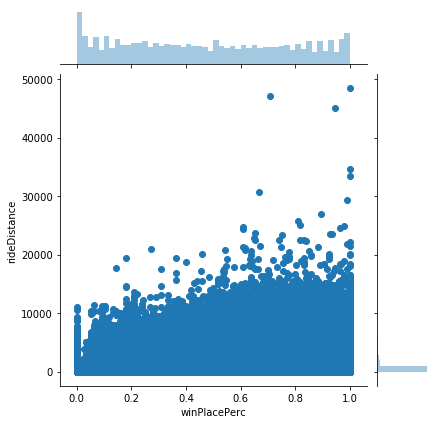

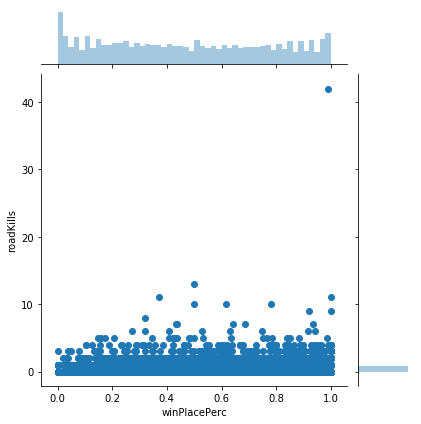

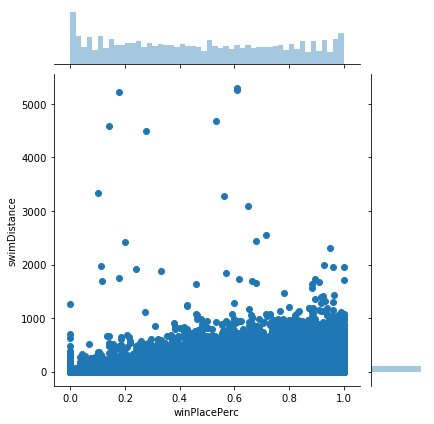

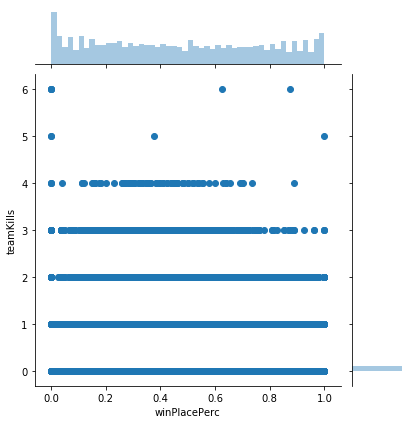

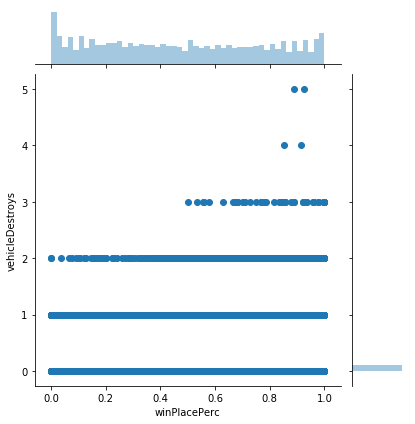

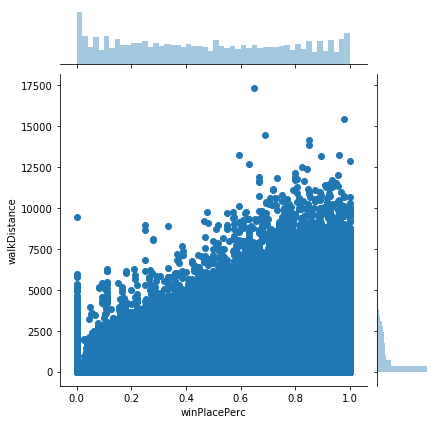

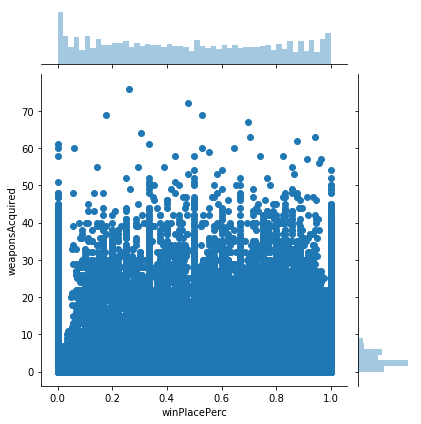

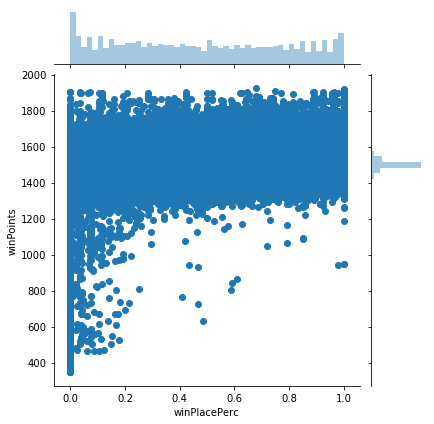

In [37]:
for x in X.columns.drop(['kills', 'assists', 'DBNOs', 'damageDealt',
                         'boosts', 'heals', 'revives', 
                         'walkDistance', 'rideDistance', 'swimDistance',
                        'headshotKills', 'killStreaks', 'longestKill', 'roadKills', 'teamKills', 'vehicleDestroys',
                        'weaponsAcquired', 'killPlace', 'killPoints']):
    sns.jointplot(x='winPlacePerc',y=x, data=train_data )
    plt.show()

## Correlation

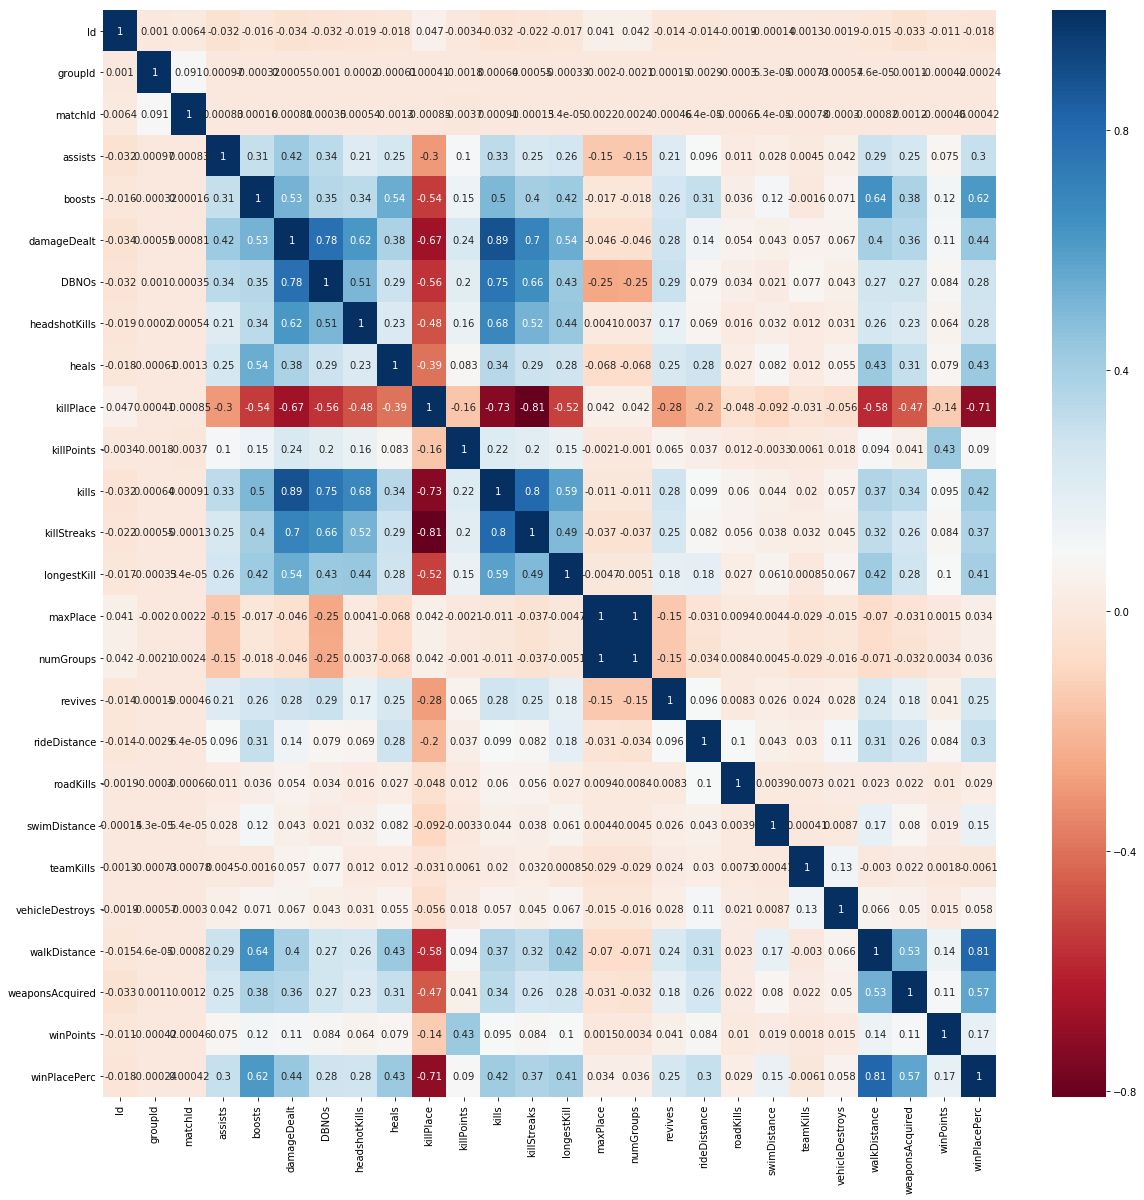

In [72]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_data.corr(), cmap='RdBu',annot=True)
plt.show()

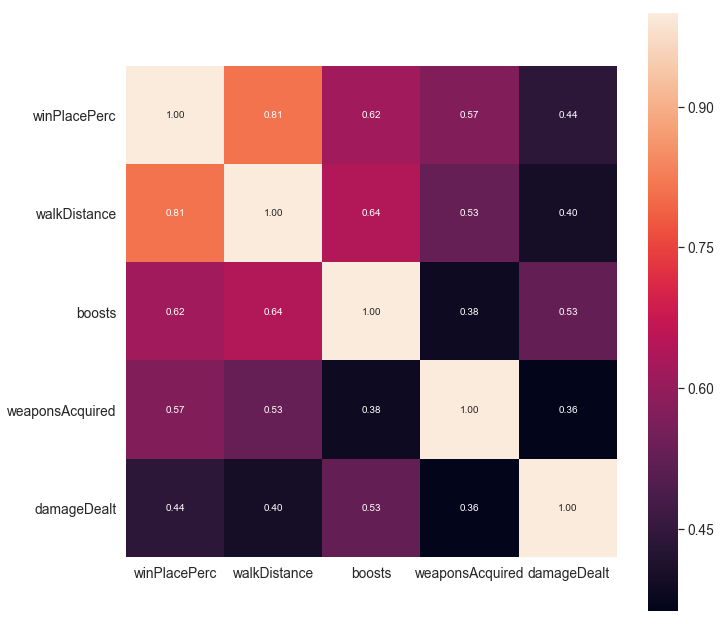

In [128]:
k = 5 #number of variables for heatmap
fig,ax = plt.subplots(figsize=(11, 11))
cols = train_data.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Preprocessing

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [27]:
scaler_pred = MinMaxScaler()
pred_feat = pd.DataFrame(scaler_pred.fit_transform(pred_feat))

# Model Training

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.80675048470203725

In [32]:
model = LinearRegression()
model.fit(X, y)
pred = model.predict(pred_feat)

submissions['winPlacePerc'] = pred
submissions.to_csv('LinearRegression.csv', index=False)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.90853198324529694

In [35]:
model = RandomForestRegressor()
model.fit(X, y)
pred = model.predict(pred_feat)

submissions['winPlacePerc'] = pred
submissions.to_csv('RandomForestRegressor.csv', index=False)

## Keras Neural Network

In [37]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

### [22->11->1]

In [38]:
def NeuralNetwork1():
    model = Sequential()
    model.add(Dense(11, input_dim=22, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [39]:
network1 = NeuralNetwork1()

In [40]:
network1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 3268002 samples, validate on 1089334 samples
Epoch 1/5
3268002/3268002 [==============================] - 309s 94us/step - loss: 0.0151 - mean_absolute_error: 0.0921 - val_loss: 0.0109 - val_mean_absolute_error: 0.0776
Epoch 2/5
3268002/3268002 [==============================] - 304s 93us/step - loss: 0.0144 - mean_absolute_error: 0.0898 - val_loss: 0.0103 - val_mean_absolute_error: 0.0741
Epoch 3/5
3268002/3268002 [==============================] - 301s 92us/step - loss: 0.0144 - mean_absolute_error: 0.0897 - val_loss: 0.0106 - val_mean_absolute_error: 0.0750
Epoch 4/5
3268002/3268002 [==============================] - 299s 92us/step - loss: 0.0144 - mean_absolute_error: 0.0896 - val_loss: 0.0105 - val_mean_absolute_error: 0.0754
Epoch 5/5
3268002/3268002 [==============================] - 296s 91us/step - loss: 0.0144 - mean_absolute_error: 0.0896 - val_loss: 0.0104 - val_mean_absolute_error: 0.0741


### [22->44->1]

In [41]:
def NeuralNetwork2():
    model = Sequential()
    model.add(Dense(44, input_dim=22, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [42]:
network2 = NeuralNetwork2()

In [43]:
network2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 3268002 samples, validate on 1089334 samples
Epoch 1/5
3268002/3268002 [==============================] - 327s 100us/step - loss: 0.0133 - mean_absolute_error: 0.0865 - val_loss: 0.0097 - val_mean_absolute_error: 0.0724
Epoch 2/5
3268002/3268002 [==============================] - 368s 112us/step - loss: 0.0127 - mean_absolute_error: 0.0843 - val_loss: 0.0100 - val_mean_absolute_error: 0.0740
Epoch 3/5
3268002/3268002 [==============================] - 322s 99us/step - loss: 0.0126 - mean_absolute_error: 0.0838 - val_loss: 0.0094 - val_mean_absolute_error: 0.0703
Epoch 4/5
3268002/3268002 [==============================] - 324s 99us/step - loss: 0.0125 - mean_absolute_error: 0.0837 - val_loss: 0.0098 - val_mean_absolute_error: 0.0715
Epoch 5/5
3268002/3268002 [==============================] - 294s 90us/step - loss: 0.0125 - mean_absolute_error: 0.0836 - val_loss: 0.0096 - val_mean_absolute_error: 0.0713


In [44]:
network = NeuralNetwork2()
network.fit(X, y, epochs=10)
pred = network.predict(pred_feat)

Epoch 1/25
4357336/4357336 [==============================] - 294s 68us/step - loss: 0.0131 - mean_absolute_error: 0.0856
Epoch 2/25
4357336/4357336 [==============================] - 312s 72us/step - loss: 0.0127 - mean_absolute_error: 0.0841
Epoch 3/25
4357336/4357336 [==============================] - 282s 65us/step - loss: 0.0126 - mean_absolute_error: 0.0838
Epoch 4/25
4357336/4357336 [==============================] - 286s 66us/step - loss: 0.0126 - mean_absolute_error: 0.0837
Epoch 5/25
4357336/4357336 [==============================] - 282s 65us/step - loss: 0.0126 - mean_absolute_error: 0.0837
Epoch 6/25
4357336/4357336 [==============================] - 289s 66us/step - loss: 0.0125 - mean_absolute_error: 0.0837
Epoch 7/25
4357336/4357336 [==============================] - 288s 66us/step - loss: 0.0125 - mean_absolute_error: 0.0836
Epoch 8/25
4357336/4357336 [==============================] - 290s 67us/step - loss: 0.0125 - mean_absolute_error: 0.0834
Epoch 9/25
4357336/43573

In [45]:
for p in pred[:5]:
    print(p)

[ 0.40338448]
[ 0.54949528]
[ 0.23413759]
[ 0.32120159]
[ 0.26074725]


In [46]:
submissions['winPlacePerc'] = pred
submissions.to_csv('Keras22-44-1.csv', index=False)

### [22->44->22->11->1]

In [47]:
def NeuralNetwork3():
    model = Sequential()
    model.add(Dense(44, input_dim=22, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(22, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(11, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [48]:
network3 = NeuralNetwork3()

In [49]:
network3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 3268002 samples, validate on 1089334 samples
Epoch 1/5
3268002/3268002 [==============================] - 606s 186us/step - loss: 0.0132 - mean_absolute_error: 0.0855 - val_loss: 0.0152 - val_mean_absolute_error: 0.0962
Epoch 2/5
3268002/3268002 [==============================] - 469s 144us/step - loss: 0.0122 - mean_absolute_error: 0.0820 - val_loss: 0.0100 - val_mean_absolute_error: 0.0738
Epoch 3/5
3268002/3268002 [==============================] - 443s 136us/step - loss: 0.0120 - mean_absolute_error: 0.0812 - val_loss: 0.0147 - val_mean_absolute_error: 0.0934
Epoch 4/5
3268002/3268002 [==============================] - 444s 136us/step - loss: 0.0119 - mean_absolute_error: 0.0807 - val_loss: 0.0113 - val_mean_absolute_error: 0.0823
Epoch 5/5
3268002/3268002 [==============================] - 443s 135us/step - loss: 0.0118 - mean_absolute_error: 0.0805 - val_loss: 0.0111 - val_mean_absolute_error: 0.0798


### [22->512->256->128->1]

In [50]:
def NeuralNetwork4():
    model = Sequential()
    model.add(Dense(512, input_dim=22, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [51]:
network4 = NeuralNetwork4()

In [52]:
network4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 3268002 samples, validate on 1089334 samples
Epoch 1/5
3268002/3268002 [==============================] - 1242s 380us/step - loss: 0.0115 - mean_absolute_error: 0.0792 - val_loss: 0.0109 - val_mean_absolute_error: 0.0758
Epoch 2/5
3268002/3268002 [==============================] - 1259s 385us/step - loss: 0.0104 - mean_absolute_error: 0.0753 - val_loss: 0.0092 - val_mean_absolute_error: 0.0687
Epoch 3/5
3268002/3268002 [==============================] - 1253s 383us/step - loss: 0.0101 - mean_absolute_error: 0.0739 - val_loss: 0.0090 - val_mean_absolute_error: 0.0670
Epoch 4/5
3268002/3268002 [==============================] - 1278s 391us/step - loss: 0.0099 - mean_absolute_error: 0.0732 - val_loss: 0.0105 - val_mean_absolute_error: 0.0759
Epoch 5/5
3268002/3268002 [==============================] - 1304s 399us/step - loss: 0.0097 - mean_absolute_error: 0.0724 - val_loss: 0.0101 - val_mean_absolute_error: 0.0709


In [54]:
network = NeuralNetwork4()
network.fit(X, y, epochs=10)
pred = network.predict(pred_feat)

Epoch 1/10
4357336/4357336 [==============================] - 1528s 351us/step - loss: 0.0113 - mean_absolute_error: 0.0787
Epoch 2/10
4357336/4357336 [==============================] - 1536s 353us/step - loss: 0.0103 - mean_absolute_error: 0.0748
Epoch 3/10
4357336/4357336 [==============================] - 1538s 353us/step - loss: 0.0100 - mean_absolute_error: 0.0737
Epoch 4/10
4357336/4357336 [==============================] - 1548s 355us/step - loss: 0.0099 - mean_absolute_error: 0.0732
Epoch 5/10
4357336/4357336 [==============================] - 1555s 357us/step - loss: 0.0098 - mean_absolute_error: 0.0727
Epoch 6/10
4357336/4357336 [==============================] - 1429s 328us/step - loss: 0.0097 - mean_absolute_error: 0.0724
Epoch 7/10
4357336/4357336 [==============================] - 2457s 564us/step - loss: 0.0097 - mean_absolute_error: 0.0721
Epoch 8/10
4357336/4357336 [==============================] - 1608s 369us/step - loss: 0.0095 - mean_absolute_error: 0.0715
Epoch 9/

In [55]:
submissions['winPlacePerc'] = pred
submissions.to_csv('Keras22-512-256-128-1.csv', index=False)